In [7]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [8]:
import os

correct_path = '/content/drive/MyDrive/Medical_Data/archive/chest_xray/chest_xray'
print(os.listdir(correct_path))



['val', 'test', 'train']


In [9]:
print("Train folders:", os.listdir(correct_path + '/train'))
print("Val folders:", os.listdir(correct_path + '/val'))
print("Test folders:", os.listdir(correct_path + '/test'))


Train folders: ['PNEUMONIA', 'NORMAL']
Val folders: ['NORMAL', 'PNEUMONIA']
Test folders: ['NORMAL', 'PNEUMONIA']


In [10]:
import glob
import os

for file in glob.glob(correct_path + '/**/.DS_Store', recursive=True):
    os.remove(file)


In [11]:
print(os.listdir(correct_path + '/train'))


['PNEUMONIA', 'NORMAL']


In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_gen = ImageDataGenerator(rescale=1./255)

train_gen = data_gen.flow_from_directory(
    '/content/drive/MyDrive/Medical_Data/archive/chest_xray/chest_xray/train',
    target_size=(224, 224),
    color_mode='rgb',  # DenseNet expects 3 channels
    batch_size=32,
    class_mode='binary'
)

val_gen = data_gen.flow_from_directory(
    '/content/drive/MyDrive/Medical_Data/archive/chest_xray/chest_xray/val',
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    class_mode='binary'
)


Found 5218 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [14]:
import os

val_path = '/content/drive/MyDrive/Medical_Data/archive/chest_xray/chest_xray/val'

print("VAL subfolders:", os.listdir(val_path))
print("NORMAL images:", len(os.listdir(os.path.join(val_path, 'NORMAL'))))
print("PNEUMONIA images:", len(os.listdir(os.path.join(val_path, 'PNEUMONIA'))))


VAL subfolders: ['NORMAL', 'PNEUMONIA']
NORMAL images: 8
PNEUMONIA images: 8


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define ImageDataGenerator with 20% validation split
data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Training generator (80%)
train_gen = data_gen.flow_from_directory(
    '/content/drive/MyDrive/Medical_Data/archive/chest_xray/chest_xray/train',
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True
)

# Validation generator (20%)
val_gen = data_gen.flow_from_directory(
    '/content/drive/MyDrive/Medical_Data/archive/chest_xray/chest_xray/train',
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=True
)


Found 4175 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.


In [16]:
print("Train samples:", train_gen.samples)
print("Validation samples:", val_gen.samples)


Train samples: 4175
Validation samples: 1043


In [17]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam

# Input shape must match your images
input_tensor = Input(shape=(224, 224, 3))  # 3 channels for RGB

# Load pretrained DenseNet121, excluding the top classifier
base_model = DenseNet121(include_top=False, weights='imagenet', input_tensor=input_tensor)

# Freeze base model layers to use as a feature extractor
base_model.trainable = False

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)  # For binary classification

# Define final model
model = Model(inputs=base_model.input, outputs=output)


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [18]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [19]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


131/131 ━━━━━━━━━━━━━━━━━━━━ 2095s 16s/step - accuracy: 0.8344 - loss: 0.3690 - val_accuracy: 0.9415 - val_loss: 0.2002
Epoch 2/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 1113s 8s/step - accuracy: 0.9329 - loss: 0.1869 - val_accuracy: 0.9444 - val_loss: 0.1699
Epoch 3/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 1130s 9s/step - accuracy: 0.9434 - loss: 0.1532 - val_accuracy: 0.9549 - val_loss: 0.1295
Epoch 4/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 1120s 9s/step - accuracy: 0.9612 - loss: 0.1222 - val_accuracy: 0.9607 - val_loss: 0.1150
Epoch 5/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 1067s 8s/step - accuracy: 0.9515 - loss: 0.1288 - val_accuracy: 0.9540 - val_loss: 0.1213
Epoch 6/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 1098s 8s/step - accuracy: 0.9606 - loss: 0.1062 - val_accuracy: 0.9674 - val_loss: 0.0985
Epoch 7/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 1126s 9s/step - accuracy: 0.9616 - loss: 0.1056 - val_accuracy: 0.9655 - val_loss: 0.0929
Epoch 8/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 1079s 8s/step - accuracy: 0.9670 - loss: 0.0920 - val_accura

In [20]:
model.save('/content/drive/MyDrive/final_densenet121_freeze_v1.h5')


In [21]:
import os

test_path = '/content/drive/MyDrive/Medical_Data/archive/chest_xray/chest_xray/test'

# List class subfolders
print("Test set classes:", os.listdir(test_path))

# Count images in each class
for class_name in os.listdir(test_path):
    class_dir = os.path.join(test_path, class_name)
    if os.path.isdir(class_dir):
        num_images = len(os.listdir(class_dir))
        print(f"{class_name}: {num_images} images")


Test set classes: ['NORMAL', 'PNEUMONIA']
NORMAL: 234 images
PNEUMONIA: 390 images


In [22]:
test_gen = data_gen.flow_from_directory(
    '/content/drive/MyDrive/Medical_Data/archive/chest_xray/chest_xray/test',
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Evaluate model
test_loss, test_acc = model.evaluate(test_gen)
print(f"✅ Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")


Found 624 images belonging to 2 classes.
20/20 ━━━━━━━━━━━━━━━━━━━━ 203s 10s/step - accuracy: 0.6568 - loss: 0.8660
✅ Test Accuracy: 0.8093, Test Loss: 0.5030


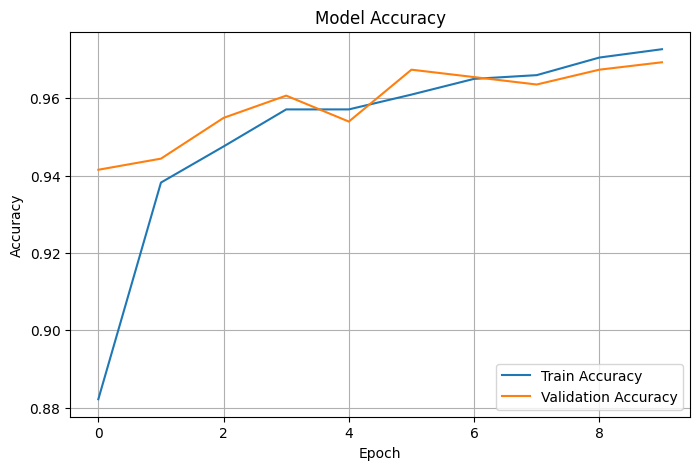

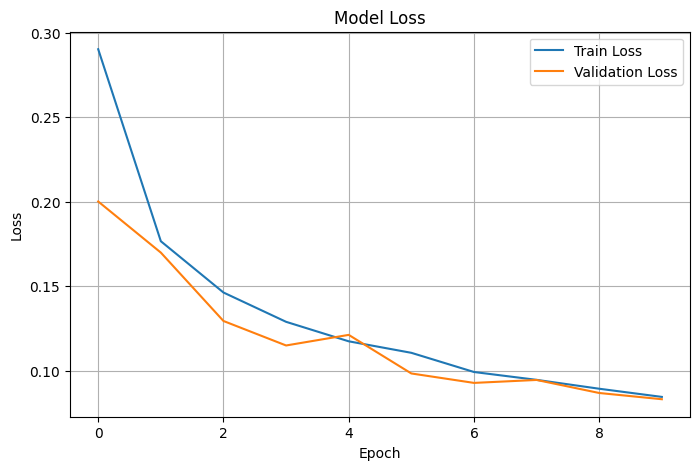

In [25]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Loss plot
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [26]:
import numpy as np

# Predict probabilities
y_probs = model.predict(test_gen)

# Convert probabilities to class predictions (0 or 1)
y_pred = (y_probs > 0.5).astype(int).reshape(-1)

# True labels from generator
y_true = test_gen.classes


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)


20/20 ━━━━━━━━━━━━━━━━━━━━ 136s 6s/step


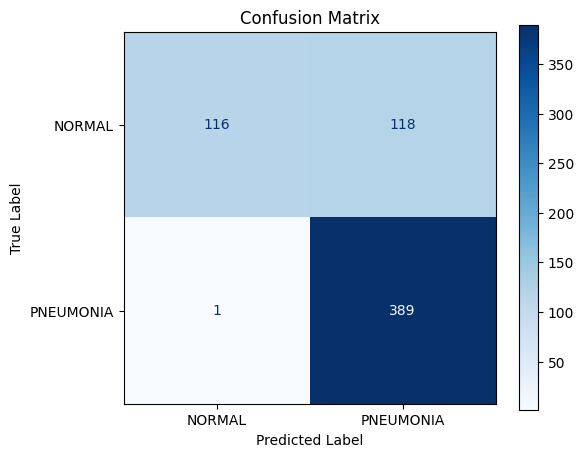

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get true class labels
class_names = list(test_gen.class_indices.keys())  # ['NORMAL', 'PNEUMONIA']

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', values_format='d', ax=plt.gca())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.grid(False)
plt.show()


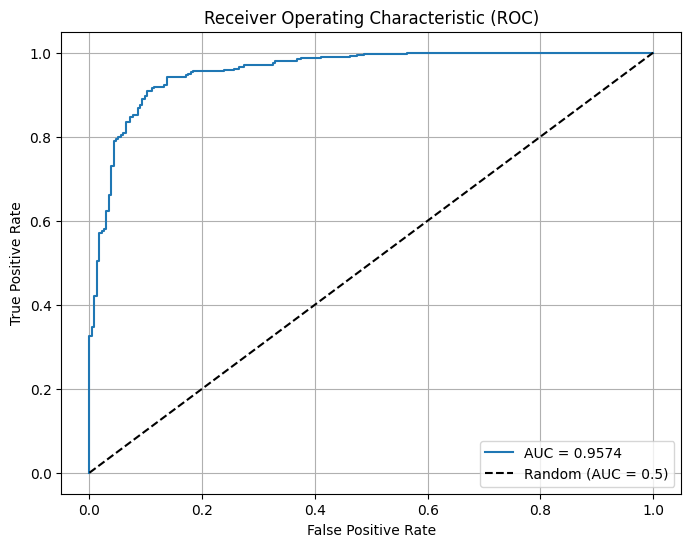

In [36]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_true, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
